### 원문 벡터 db + QA 벡터 DB 하이브리드 (하나의 프롬프트에 같이 주는 방식)

In [1]:
from pathlib import Path
import sys

root = Path.cwd()
while not (root / "utils").exists() and root != root.parent:
    root = root.parent
sys.path.insert(0, str(root))

from utils.main3 import run_langraph

C:\Workspaces\final_ai\LLM_hybrid\utils\retriever.py:51: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vs = Chroma(


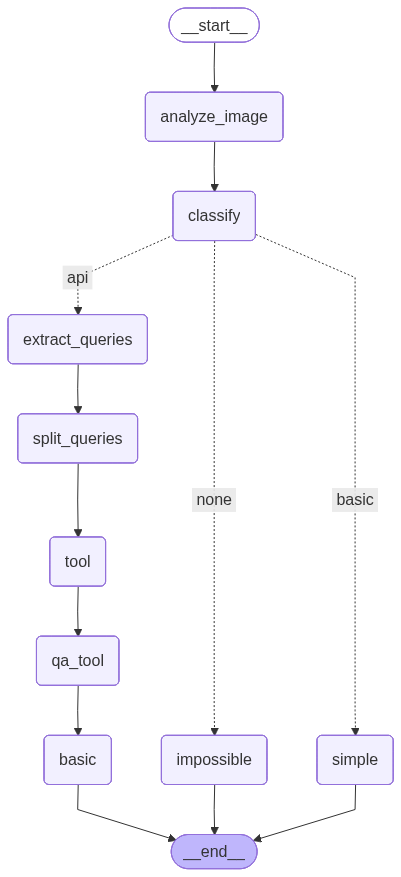

In [2]:
from utils.langgraph_setting2 import graph_setting

graph = graph_setting()

graph

In [3]:
response = run_langraph('Firebase의 updateTime 필드에 사용되는 시간 형식이 뭐야?', '1', None)
print(response)

run_langraph 호출 - 입력: Firebase의 updateTime 필드에 사용되는 시간 형식이 뭐야?, 이미지: False
analyze_image 호출됨 - 이미지 존재: False
검색 중: 'Firebase의 updateTime 필드에 사용되는 시간 형식은 무엇인가요?' with filters: {'tags': {'$in': ['firebase_firestore_crawled']}}
검색 중: 'Firebase의 updateTime 필드에 사용되는 시간 형식은 무엇인가요?' with filters: {'tags': {'$in': ['firestore', 'firebase_authentication']}}
[Document(metadata={'source_file': 'cloud.google.com_firestore_docs_reference_rest_v1beta1_projects.databases.documents_hl=ko.txt', 'last_verified': '2025-09-10', 'source': '["https://cloud.google.com/firestore/docs/reference/rest/v1beta1/projects.databases.documents?hl=ko"]', 'tags': 'firestore'}, page_content='Q: Firestore 문서의 생성 시간(createTime)과 업데이트 시간(updateTime)의 형식은 어떻게 되나요?\nA: 두 시간 모두 RFC 3339 형식을 사용하며, 예시는 다음과 같습니다: "2014-10-02T15:01:23Z", "2014-10-02T15:01:23.045123456Z" 또는 "2014-10-02T15:01:23+05:30".'), Document(metadata={'source': '["https://cloud.google.com/firestore/docs/reference/rest/v1/projects.databases?hl=ko"]', 'source_f

In [4]:
# print(response['answer'])
# print(response['tool_calls'])
print(response['qa_tool_calls'])

[{'tool': 'qa_vector_search_tool', 'args': {'query': 'Firebase의 updateTime 필드에 사용되는 시간 형식은 무엇인가요?', 'api_tags': ['firestore']}, 'result': ['Q: Firestore 문서의 생성 시간(createTime)과 업데이트 시간(updateTime)의 형식은 어떻게 되나요?\nA: 두 시간 모두 RFC 3339 형식을 사용하며, 예시는 다음과 같습니다: "2014-10-02T15:01:23Z", "2014-10-02T15:01:23.045123456Z" 또는 "2014-10-02T15:01:23+05:30".', 'Q: Cloud Firestore 데이터베이스의 업데이트 시간을 확인하는 방법은 무엇인가요?\nA: 데이터베이스의 업데이트 시간은 `updateTime` 필드에서 확인할 수 있습니다. 이 필드는 타임스탬프 형식으로 제공되며, 데이터베이스 리소스가 마지막으로 업데이트된 시간을 나타냅니다. 예를 들어, `updateTime`의 값은 다음과 같은 형식입니다: "2014-10-02T15:01:23Z".', 'Q: updateTime 필드는 어떻게 사용되며, 어떤 형식이 필요한가요?\nA: updateTime 필드(string)는 대상 문서가 존재해야 하며 마지막으로 업데이트된 시간이 이 시간과 일치해야 함을 설정합니다. 타임스탬프는 마이크로초 정렬이 되어야 하며, RFC 3339 형식을 사용해야 합니다. 예시: "2014-10-02T15:01:23Z", "2014-10-02T15:01:23.045123456Z" 또는 "2014-10-02T15:01:23+05:30".', 'Q: updateTime 필드는 어떻게 사용되며, 어떤 형식을 가져야 하나요?\nA: updateTime 필드(string)는 타겟 문서가 존재해야 하며 마지막으로 업데이트된 시간이 이 시간과 일치해야 함을 나타냅니다. 타임스탬프는 마이크로초 정렬되어야 하며, RFC 3339 형식을 사용해

In [9]:
## 환경설정
!pip install -qU ragas langchain langchain-community langchain-openai langchain-chroma langchain-text-splitters pypdf rapidfuzz langgraph gdown chromadb langchain-huggingface sentence-transformers -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.18.0 requires aiofiles<24.0,>=22.0, but you have aiofiles 24.1.0 which is incompatible.
gradio 5.18.0 requires gradio-client==1.7.2, but you have gradio-client 1.10.1 which is incompatible.
gradio 5.18.0 requires markupsafe~=2.0, but you have markupsafe 3.0.2 which is incompatible.


In [2]:
!pip install ragas

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()
# 필요한 라이브러리 임포트
import os
import pandas as pd
from pprint import pprint
# LangChain 관련 라이브러리
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
# RAGAS 관련 라이브러리
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from ragas.testset.persona import Persona
from ragas.testset import TestsetGenerator
from ragas import EvaluationDataset, evaluate
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness

## 이미 생성된 합성 데이터셋 생성

In [4]:
import pandas as pd

# 같은 폴더(현재 작업 디렉토리)에 저장했다면
dataset_df = pd.read_csv("./dataset.csv")
print(dataset_df.shape)
display(dataset_df)

(20, 3)


,user_input,reference_contexts,reference
0,Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?,사용자가 다음 작업을 수행할 수 있게 해주는 Analytics Hub 게시자 역할(...,"Analytics Hub 게시자 역할은 목록을 생성, 업데이트, 삭제하고 목록에 I..."
1,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 어떻게 해...,BigQuery Studio 저장된 쿼리에 공개 액세스 권한이 부여되지 않도록 하려...,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 프로젝트에...
2,calendarId에 primary 키워드를 사용하면 어떤 캘린더에 접근할 수 있나요?,현재 로그인한 사용자의 기본 캘린더에 액세스하려면 'primary' 키워드를 사용하세요.,calendarId에 primary 키워드를 사용하면 현재 로그인한 사용자의 기본 ...
3,Google Drive API v3의 서비스 엔드포인트가 궁금해,"이 서비스에는 다음 서비스 엔드포인트가 포함되고, 그 아래의 모든 URI가 이 서비...",Google Drive API v3의 서비스 엔드포인트는 https://www.go...
4,files.create 메서드의 최대 파일 크기와 허용되는 미디어 MIME 유형은 ...,"최대 파일 크기: 5,120GB\r\n허용되는 미디어 MIME 유형: */*\r\n...","files.create 메서드의 최대 파일 크기는 5,120GB입니다. 허용되는 미..."
5,Firebase scrypt 해시 비밀번호를 사용한 사용자 가져오는 방법은?,기본적으로 Firebase는 scrypt 해싱 알고리즘의 수정된 Firebase 버...,"Firebase scrypt 해시 비밀번호를 사용한 사용자를 가져오려면, 먼저 Fi..."
6,커스텀 인증 시스템으로 Firebase에 인증하려면 어떻게 해야 하나요?,Firebase 인증에 맞춤 인증 시스템을 통합할 수 있습니다. 사용자가 정상적으로...,"커스텀 인증 시스템으로 Firebase에 인증하려면, 먼저 인증 서버에서 사용자의 ..."
7,"Firestore에서 맵 필드에 대한 단일 필드 색인 예외를 설정하면, 하위 필드들...",맵 필드에 단일 필드 색인 예외를 만들면 맵의 하위 필드에서 해당 설정을 상속합니다...,"네, Firestore에서 맵 필드에 단일 필드 색인 예외를 만들면 맵의 하위 필드..."
8,Firebase의 updateTime 필드에 사용되는 시간 형식이 뭐야?,"Uses RFC 3339, where generated output will alw...",Firebase의 updateTime 필드에는 RFC 3339 시간 형식이 사용됩니...
9,Firefox 58 환경에서 Gmail의 AMP 렌더링 기능이 호환되나요?,브라우저 최소 버전\r\nChrome 69\r\nEdge 지원되지 않음\r\nFir...,"네, Firefox 58 환경에서는 Gmail의 AMP 렌더링 기능이 호환됩니다. ..."


In [5]:

## 02.RAG 체인 구성

import pandas as pd
from datasets import Dataset
import uuid
import time


evaluated_dataset = []

for _, row in dataset_df.iterrows():
    time.sleep(3)
    query = row.user_input  # 사용자 입력 - 합성 데이터셋에서 가져옴

    # run_langraph 함수 호출
    rag_result = run_langraph(query,'1', None)

    evaluated_dataset.append(
        {
            "user_input": query,
            "retrieved_contexts": [doc for doc in rag_result["search_results"]],
            "response": rag_result["answer"],
            "reference": row['reference']
        }
    )

print("평가 데이터셋 준비 완료")

# RAGAS 평가 데이터셋 생성
ragas_evaluated_dataset = Dataset.from_list(evaluated_dataset)
# csv 데이터 저장
ragas_evaluated_dataset.to_pandas().to_csv('ragas_evaluated_dataset5.csv', index=False)
ragas_evaluated_dataset.to_pandas().info()

run_langraph 호출 - 입력: Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?, 이미지: False
analyze_image 호출됨 - 이미지 존재: False
검색 중: 'Analytics Hub에서 게시자 역할과 목록 관리자 역할의 차이점은 무엇인가요?' with filters: {'tags': {'$in': ['bigquery']}}
검색 중: 'Analytics Hub에서 게시자 역할과 목록 관리자 역할의 차이점은 무엇인가요?' with filters: {'tags': {'$in': ['bigquery']}}
[Document(metadata={'tags': 'bigquery', 'last_verified': '2025-08-19', 'source': '["https://cloud.google.com/bigquery/docs/reference/rest/v2/Policy"]', 'source_file': 'bigquery_docs_reference_rest_v2_Policy.txt'}, page_content='Q: IAM 정책(Policy)에서 bindings의 역할은 무엇인가요?\nA: bindings는 하나 이상의 멤버(또는 주체)를 단일 역할(role)에 바인딩하는 역할을 합니다. 각 바인딩은 사용자 계정, 서비스 계정, Google 그룹 및 도메인(예: G Suite)과 같은 주체를 포함할 수 있습니다.'), Document(metadata={'source': '["https://cloud.google.com/bigquery/docs/reference/rest/v2/projects"]', 'source_file': 'bigquery_docs_reference_rest_v2_projects.txt', 'last_verified': '2025-08-19', 'tags': 'bigquery'}, page_content='Q: BigQuery API에서 프로젝트 목록을 나열할 때 반환되는 데이터 구조는 어떻게 되나요?

In [8]:
### RAGAS 평가 실행

# LLM 래퍼 생성
evaluator_llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
evaluator_llm = LangchainLLMWrapper(evaluator_llm)

# 평가 메트릭 정의
metrics = [
    LLMContextRecall(),  # 검색된 컨텍스트의 회수율
    Faithfulness(),  # 생성된 답변의 충실도
    FactualCorrectness()  # 사실적 정확성
]
# 평가 실행

result = evaluate(
    dataset=ragas_evaluated_dataset,
    metrics=metrics,
    llm=evaluator_llm,
)

print(result)
# 결과를 DataFrame으로 변환
result_df = result.to_pandas()

# 결과 저장
result_df.to_csv('ragas_evaluation_result5.csv', index=False)

display(result_df.head())
result_df[['context_recall', 'faithfulness', 'factual_correctness(mode=f1)']].describe()

Evaluating:   0%|          | 0/60 [00:00<?, ?it/s]

{'context_recall': 0.9400, 'faithfulness': 0.8658, 'factual_correctness(mode=f1)': 0.6085}


,user_input,retrieved_contexts,response,reference,context_recall,faithfulness,factual_correctness(mode=f1)
0,Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?,"[데이터 교환을 생성, 업데이트, 삭제합니다.\n목록을 생성, 업데이트, 삭제, 공...",Analytics Hub 게시자 역할과 목록 관리자 역할의 차이점은 다음과 같습니다...,"Analytics Hub 게시자 역할은 목록을 생성, 업데이트, 삭제하고 목록에 I...",1.0,1.000000,0.92
1,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 어떻게 해...,[탐색기 창에서 프로젝트와 쿼리 폴더를 펼치고 필요한 경우 공유 쿼리 폴더를 펼칩니...,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 프로젝트에...,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 프로젝트에...,1.0,1.000000,0.91
2,calendarId에 primary 키워드를 사용하면 어떤 캘린더에 접근할 수 있나요?,[이 페이지는 Cloud Translation API [https://cloud.g...,현재 로그인한 사용자의 기본 캘린더에 접근할 수 있습니다. `primary` 키워드...,calendarId에 primary 키워드를 사용하면 현재 로그인한 사용자의 기본 ...,1.0,0.500000,0.67
3,Google Drive API v3의 서비스 엔드포인트가 궁금해,[https://www.googleapis.com/discovery/v1/apis/...,Google Drive API v3의 서비스 엔드포인트는 `https://www.g...,Google Drive API v3의 서비스 엔드포인트는 https://www.go...,1.0,1.000000,0.67
4,files.create 메서드의 최대 파일 크기와 허용되는 미디어 MIME 유형은 ...,[이 페이지는 Cloud Translation API [https://cloud.g...,files.create 메서드를 사용하여 파일을 업로드할 때 지원되는 최대 파일 크...,"files.create 메서드의 최대 파일 크기는 5,120GB입니다. 허용되는 미...",1.0,0.833333,0.60


,context_recall,faithfulness,factual_correctness(mode=f1)
count,20.000000,20.000000,20.000000
mean,0.940000,0.865833,0.608500
std,0.225715,0.228296,0.267056
min,0.000000,0.333333,0.000000
25%,1.000000,0.812500,0.500000
50%,1.000000,1.000000,0.635000
75%,1.000000,1.000000,0.720000
max,1.000000,1.000000,1.000000


In [7]:
display(result_df)

,user_input,retrieved_contexts,response,reference,context_recall,faithfulness,factual_correctness(mode=f1)
0,Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?,"[데이터 교환을 생성, 업데이트, 삭제합니다.\n목록을 생성, 업데이트, 삭제, 공...",Analytics Hub 게시자 역할과 목록 관리자 역할의 차이점은 다음과 같습니다...,"Analytics Hub 게시자 역할은 목록을 생성, 업데이트, 삭제하고 목록에 I...",1.0,1.000000,0.92
1,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 어떻게 해...,[탐색기 창에서 프로젝트와 쿼리 폴더를 펼치고 필요한 경우 공유 쿼리 폴더를 펼칩니...,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 프로젝트에...,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 프로젝트에...,1.0,1.000000,0.91
2,calendarId에 primary 키워드를 사용하면 어떤 캘린더에 접근할 수 있나요?,[이 페이지는 Cloud Translation API [https://cloud.g...,현재 로그인한 사용자의 기본 캘린더에 접근할 수 있습니다. `primary` 키워드...,calendarId에 primary 키워드를 사용하면 현재 로그인한 사용자의 기본 ...,1.0,0.500000,0.67
3,Google Drive API v3의 서비스 엔드포인트가 궁금해,[https://www.googleapis.com/discovery/v1/apis/...,Google Drive API v3의 서비스 엔드포인트는 `https://www.g...,Google Drive API v3의 서비스 엔드포인트는 https://www.go...,1.0,1.000000,0.67
4,files.create 메서드의 최대 파일 크기와 허용되는 미디어 MIME 유형은 ...,[이 페이지는 Cloud Translation API [https://cloud.g...,files.create 메서드를 사용하여 파일을 업로드할 때 지원되는 최대 파일 크...,"files.create 메서드의 최대 파일 크기는 5,120GB입니다. 허용되는 미...",1.0,0.833333,0.60
5,Firebase scrypt 해시 비밀번호를 사용한 사용자 가져오는 방법은?,[Source URL: https://firebase.google.com/docs/...,Firebase scrypt 해시 비밀번호를 사용한 사용자를 가져오는 방법은 다음과...,"Firebase scrypt 해시 비밀번호를 사용한 사용자를 가져오려면, 먼저 Fi...",1.0,1.000000,0.70
6,커스텀 인증 시스템으로 Firebase에 인증하려면 어떻게 해야 하나요?,[Source URL: https://firebase.google.com/docs/...,Firebase에 커스텀 인증 시스템을 통합하려면 다음과 같은 단계를 따라야 합니다...,"커스텀 인증 시스템으로 Firebase에 인증하려면, 먼저 인증 서버에서 사용자의 ...",1.0,0.900000,0.44
7,"Firestore에서 맵 필드에 대한 단일 필드 색인 예외를 설정하면, 하위 필드들...",[맵 필드에 단일 필드 색인 예외를 만들면 맵의 하위 필드에서 해당 설정을 상속합니...,"네, Firestore에서 맵 필드에 단일 필드 색인 예외를 설정하면, 맵의 하위 ...","네, Firestore에서 맵 필드에 단일 필드 색인 예외를 만들면 맵의 하위 필드...",1.0,1.000000,0.60
8,Firebase의 updateTime 필드에 사용되는 시간 형식이 뭐야?,"[웹 버전 9\nimport { doc, setDoc, Timestamp } fro...",Firebase의 updateTime 필드에 사용되는 시간 형식은 RFC 3339 ...,Firebase의 updateTime 필드에는 RFC 3339 시간 형식이 사용됩니...,1.0,1.000000,0.44
9,Firefox 58 환경에서 Gmail의 AMP 렌더링 기능이 호환되나요?,[Source URL: https://developers.google.com/wor...,"네, Firefox 58 환경에서는 Gmail의 AMP 렌더링 기능이 호환됩니다. ...","네, Firefox 58 환경에서는 Gmail의 AMP 렌더링 기능이 호환됩니다. ...",1.0,0.666667,0.80
